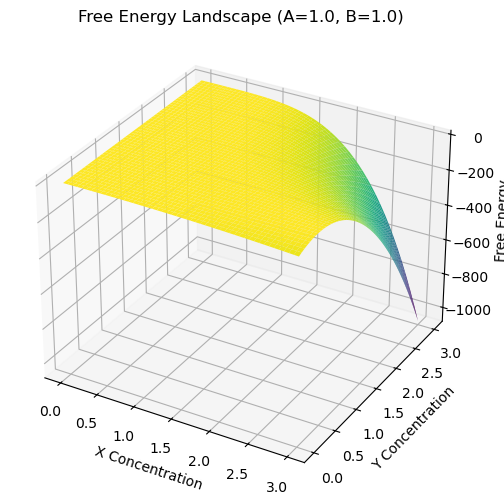

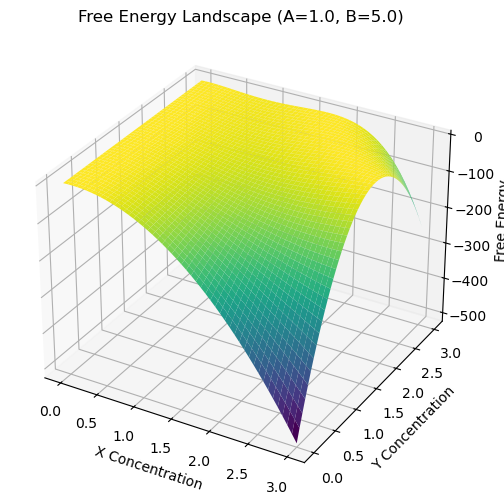

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 定义 Brusselator 模型
def brusselator(t, z, A, B):
    x, y = z
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# 计算自由能景观
def compute_free_energy(A, B):
    x_vals = np.linspace(0, 3, 50)
    y_vals = np.linspace(0, 3, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    G = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dx = A + X[i, j]**2 * Y[i, j] - (B + 1) * X[i, j]
            dy = B * X[i, j] - X[i, j]**2 * Y[i, j]
            G[i, j] = -(dx**2 + dy**2)  # 近似自由能

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, G, cmap='viridis')
    ax.set_xlabel('X Concentration')
    ax.set_ylabel('Y Concentration')
    ax.set_zlabel('Free Energy')
    ax.set_title(f'Free Energy Landscape (A={A}, B={B})')
    plt.show()

# 低 B 值（稳态）
A = 1.0
B = 1.0  # 低于 A+1，系统稳态
compute_free_energy(A, B)

# 高 B 值（振荡态）
B = 5.0  # 大于 A+1，系统进入振荡
compute_free_energy(A, B)


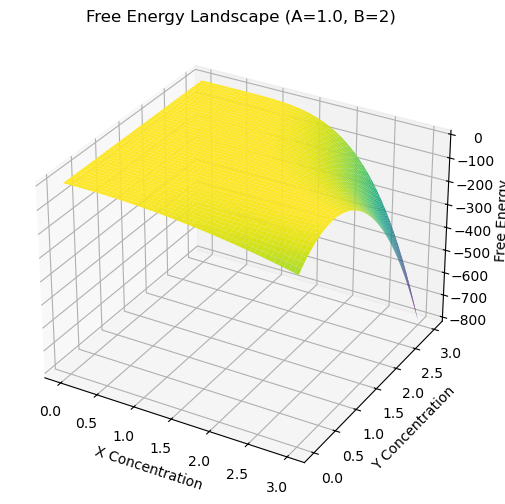

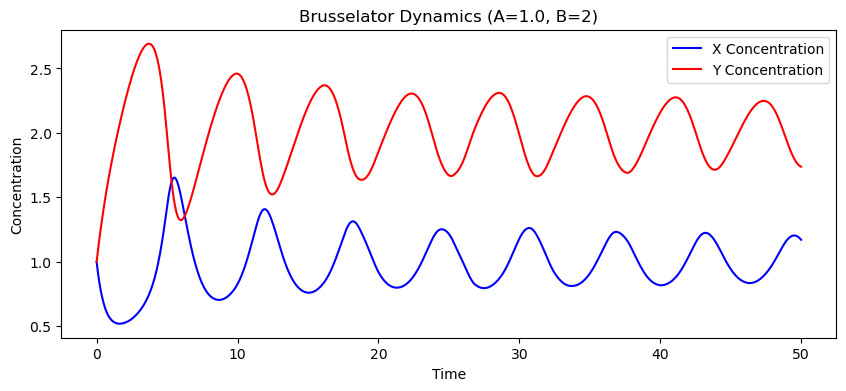

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Brusselator 模型方程
def brusselator(t, z, A, B):
    x, y = z
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# 计算 Lyapunov 近似自由能
def compute_free_energy(A, B):
    x_vals = np.linspace(0, 3, 50)
    y_vals = np.linspace(0, 3, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    G = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dx = A + X[i, j]**2 * Y[i, j] - (B + 1) * X[i, j]
            dy = B * X[i, j] - X[i, j]**2 * Y[i, j]
            G[i, j] = -(dx**2 + dy**2)  # 近似自由能

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, G, cmap='viridis')
    ax.set_xlabel('X Concentration')
    ax.set_ylabel('Y Concentration')
    ax.set_zlabel('Free Energy')
    ax.set_title(f'Free Energy Landscape (A={A}, B={B})')
    plt.show()

# 求解 Brusselator 方程并绘制时间演化图
def solve_and_plot(A, B):
    t_span = (0, 50)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    z0 = [1.0, 1.0]  # 初始条件
    sol = solve_ivp(brusselator, t_span, z0, args=(A, B), t_eval=t_eval)

    # 绘制 X, Y 的振荡情况
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(sol.t, sol.y[0], label="X Concentration", color='blue')
    ax.plot(sol.t, sol.y[1], label="Y Concentration", color='red')
    ax.set_xlabel('Time')
    ax.set_ylabel('Concentration')
    ax.set_title(f'Brusselator Dynamics (A={A}, B={B})')
    ax.legend()
    plt.show()

# 运行数值模拟
A = 1.0
B = 2 # 进入振荡态
compute_free_energy(A, B)  # 绘制自由能景观
solve_and_plot(A, B)  # 绘制 X, Y 振荡情况


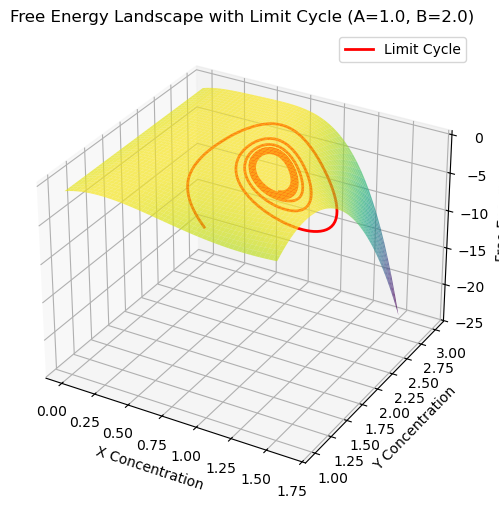

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Brusselator 模型方程
def brusselator(t, z, A, B):
    x, y = z
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# 计算 Lyapunov 近似自由能并标注环形谷
def compute_free_energy_with_limit_cycle(A, B):
    x_vals = np.linspace(0, 1.5, 50)
    y_vals = np.linspace(1, 3, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    G = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dx = A + X[i, j]**2 * Y[i, j] - (B + 1) * X[i, j]
            dy = B * X[i, j] - X[i, j]**2 * Y[i, j]
            G[i, j] = -(dx**2 + dy**2)  # 近似自由能

    # 求解 Brusselator 以获取极限环轨迹
    t_span = (0, 50)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    z0 = [1.0, 1.0]  # 初始条件
    sol = solve_ivp(brusselator, t_span, z0, args=(A, B), t_eval=t_eval)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, G, cmap='viridis', alpha=0.7)  # 绘制自由能景观
    ax.plot(sol.y[0], sol.y[1], -np.ones_like(sol.y[0]) * 0.5, 'r-', linewidth=2, label="Limit Cycle")  # 标记极限环

    ax.set_xlabel('X Concentration')
    ax.set_ylabel('Y Concentration')
    ax.set_zlabel('Free Energy')
    ax.set_title(f'Free Energy Landscape with Limit Cycle (A={A}, B={B})')
    ax.legend()
    plt.show()

# 运行数值模拟并标记极限环
A = 1.0
B = 2.0  # 进入振荡态
compute_free_energy_with_limit_cycle(A, B)


In [ ]:
# 计算 Lyapunov 近似自由能并在自由能曲面上标注极限环
def compute_free_energy_with_embedded_limit_cycle(A, B):
    x_vals = np.linspace(0, 1.5, 50)
    y_vals = np.linspace(1, 3, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    G = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dx = A + X[i, j]**2 * Y[i, j] - (B + 1) * X[i, j]
            dy = B * X[i, j] - X[i, j]**2 * Y[i, j]
            G[i, j] = -(dx**2 + dy**2)  # 近似自由能

    # 求解 Brusselator 以获取极限环轨迹
    t_span = (0, 50)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    z0 = [1.0, 1.0]  # 初始条件
    sol = solve_ivp(brusselator, t_span, z0, args=(A, B), t_eval=t_eval)
    
    # 计算极限环上的自由能值
    limit_cycle_x = sol.y[0]
    limit_cycle_y = sol.y[1]
    limit_cycle_G = np.zeros_like(limit_cycle_x)
    
    for i in range(len(limit_cycle_x)):
        dx = A + limit_cycle_x[i]**2 * limit_cycle_y[i] - (B + 1) * limit_cycle_x[i]
        dy = B * limit_cycle_x[i] - limit_cycle_x[i]**2 * limit_cycle_y[i]
        limit_cycle_G[i] = -(dx**2 + dy**2)  # 计算对应的自由能

    # 绘制自由能曲面和极限环
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, G, cmap='viridis', alpha=0.7)  # 绘制自由能曲面
    ax.plot(limit_cycle_x, limit_cycle_y, limit_cycle_G, 'r-', linewidth=2, label="Limit Cycle")  # 画出极限环

    ax.set_xlabel('X Concentration')
    ax.set_ylabel('Y Concentration')
    ax.set_zlabel('Free Energy')
    ax.set_title(f'Free Energy Landscape with Limit Cycle (A={A}, B={B})')
    ax.legend()
    plt.show()

# 运行数值模拟并在自由能曲面上嵌入极限环
A = 1.0
B = 2.0  # 进入振荡态
compute_free_energy_with_embedded_limit_cycle(A, B)


ModuleNotFoundError: No module named 'plotly'

In [49]:
# 在 VS Code 中使用 Plotly 实现完全交互式 3D 自由能景观和极限环
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import solve_ivp

# Brusselator 模型方程
def brusselator(t, z, A, B):
    x, y = z
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# 计算自由能景观和极限环
def plot_free_energy_with_limit_cycle(A, B):
    # 生成网格数据
    x_vals = np.linspace(0.8, 1.2, 50)
    y_vals = np.linspace(1.1, 1.3, 50)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    # 计算近似自由能
    G = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dx = A + X[i, j]**2 * Y[i, j] - (B + 1) * X[i, j]
            dy = B * X[i, j] - X[i, j]**2 * Y[i, j]
            G[i, j] = (dx**2 + dy**2)  # 近似自由能

    # 求解 Brusselator 以获取极限环轨迹
    t_span = (0, 50)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    z0 = [1.0, 1.0]  # 初始条件
    sol = solve_ivp(brusselator, t_span, z0, args=(A, B), t_eval=t_eval)

    # 计算极限环上的自由能值
    limit_cycle_x = sol.y[0]
    limit_cycle_y = sol.y[1]
    limit_cycle_G = np.zeros_like(limit_cycle_x)

    for i in range(len(limit_cycle_x)):
        dx = A + limit_cycle_x[i]**2 * limit_cycle_y[i] - (B + 1) * limit_cycle_x[i]
        dy = B * limit_cycle_x[i] - limit_cycle_x[i]**2 * limit_cycle_y[i]
        limit_cycle_G[i] = (dx**2 + dy**2)  # 计算对应的自由能

    # 使用 Plotly 创建交互式 3D 图
    fig = go.Figure()

    # 添加自由能曲面
    fig.add_trace(go.Surface(z=G, x=X, y=Y, colorscale='Viridis', opacity=0.8))

    # 添加极限环轨迹
    fig.add_trace(go.Scatter3d(x=limit_cycle_x, y=limit_cycle_y, z=limit_cycle_G,
                               mode='lines', line=dict(color='red', width=4),
                               name="Limit Cycle"))

    # 设置图像布局
    fig.update_layout(
        title=f"Interactive Free Energy Landscape with Limit Cycle (A={A}, B={B})",
        scene=dict(
            xaxis_title="X Concentration",
            yaxis_title="Y Concentration",
            zaxis_title="Free Energy"
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    # 显示交互式图像
    fig.show()

# 运行交互式 3D 图
A = 1.0
B = 1.5  # 进入振荡态
plot_free_energy_with_limit_cycle(A, B)



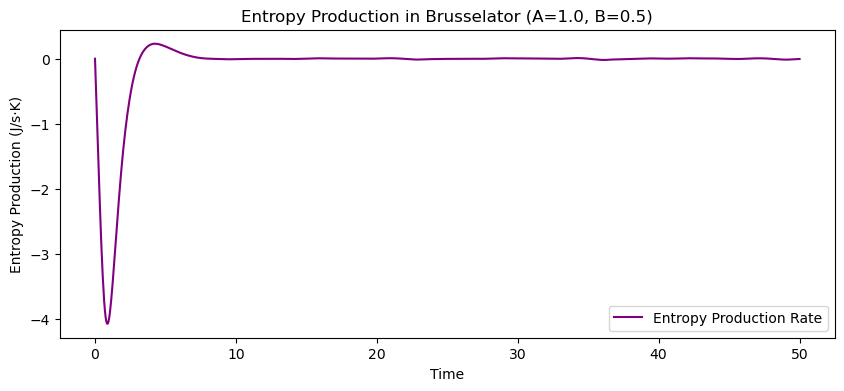

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 设定温度（单位 K）
T = 298  
R = 8.314  # 气体常数 J/(mol·K)
# Brusselator 反应模型
def brusselator(t, z, A, B):
    x, y = z
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# 计算熵产生率
def entropy_production(A, B):
    t_span = (0, 50)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    z0 = [1.0, 1.0]  # 初始条件
    sol = solve_ivp(brusselator, t_span, z0, args=(A, B), t_eval=t_eval)

    X, Y = sol.y
    J1 = A - X
    J2 = B * X - X**2 * Y
    J3 = X**2 * Y - B * X
    J4 = X

    # 计算化学势 (假设标准化学势 μ^0 = 0)
    mu_X = R * T * np.log(X + 1e-6)  # 避免 log(0) 错误
    mu_Y = R * T * np.log(Y + 1e-6)

    # 计算热力学力
    X1 = -mu_X / T
    X2 = -(mu_Y - mu_X) / T
    X3 = (2 * mu_X + mu_Y) / T
    X4 = -mu_X / T

    # 计算熵产生率
    sigma = J1 * X1 + J2 * X2 + J3 * X3 + J4 * X4

    # 绘制熵产生随时间的变化
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(sol.t, sigma, label="Entropy Production Rate", color='purple')
    ax.set_xlabel('Time')
    ax.set_ylabel('Entropy Production (J/s·K)')
    ax.set_title(f'Entropy Production in Brusselator (A={A}, B={B})')
    ax.legend()
    plt.show()

# 运行熵产生计算
A = 1.0
B = 0.5  # 进入振荡态
entropy_production(A, B)


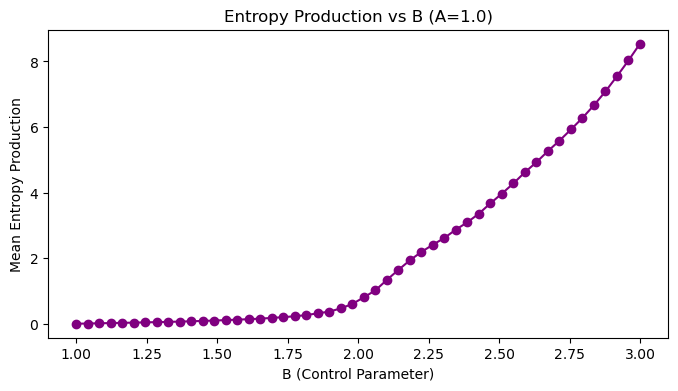

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 设定温度（单位 K）
T = 298  
R = 8.314  # 气体常数 J/(mol·K)

# Brusselator 反应模型
def brusselator(t, z, A, B):
    x, y = z
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# 计算熵产生率
def compute_entropy_vs_B(A, B_range):
    entropy_values = []
    B_values = np.linspace(*B_range, 50)

    for B in B_values:
        t_span = (0, 50)
        t_eval = np.linspace(t_span[0], t_span[1], 1000)
        z0 = [1.0, 1.0]  # 初始条件
        sol = solve_ivp(brusselator, t_span, z0, args=(A, B), t_eval=t_eval)

        X, Y = sol.y
        J1 = A - X
        J2 = B * X - X**2 * Y
        J3 = X**2 * Y - B * X
        J4 = X

        mu_X = R * T * np.log(X + 1e-6)
        mu_Y = R * T * np.log(Y + 1e-6)

        X1 = -mu_X / T
        X2 = -(mu_Y - mu_X) / T
        X3 = (2 * mu_X + mu_Y) / T
        X4 = -mu_X / T

        sigma = J1 * X1 + J2 * X2 + J3 * X3 + J4 * X4
        entropy_values.append(np.mean(sigma))

    # 绘制熵产生率 vs B 的曲线
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(B_values, entropy_values, marker='o', color='purple')
    ax.set_xlabel('B (Control Parameter)')
    ax.set_ylabel('Mean Entropy Production')
    ax.set_title(f'Entropy Production vs B (A={A})')
    plt.show()

# 运行熵产生计算，扫描 B
A = 1.0
B_range = (1.0, 3)  # 包括 Hopf 分叉点
compute_entropy_vs_B(A, B_range)
